<a href="https://colab.research.google.com/github/Shinhuynry/AI/blob/main/fuzzy(week5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=82c8a562db9a01a4489c15dcab7af47a1d5bbd374a2bd5761a3a01f52153b904
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [13]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

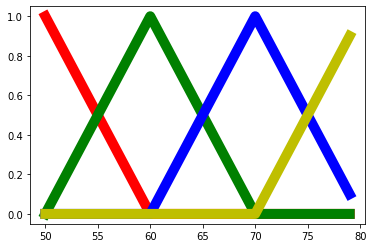

In [12]:
x= np.arange(50,80,1)
slow=fuzz.trimf(x,[50,50,60])
slow1=fuzz.trimf(x,[50,60,70])
slow2=fuzz.trimf(x,[60,70,80])
slow3=fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=10,label='slow')
plt.plot(x,slow1,'g',linewidth=10,label='medium')
plt.plot(x,slow2,'b',linewidth=10,label='medium fast')
plt.plot(x,slow3,'y',linewidth=10,label='full speed')
plt.plot

16.54901960784313


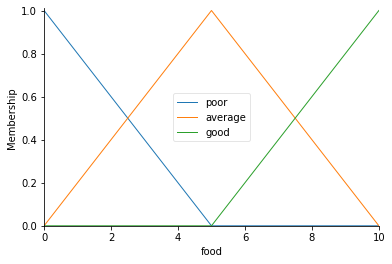

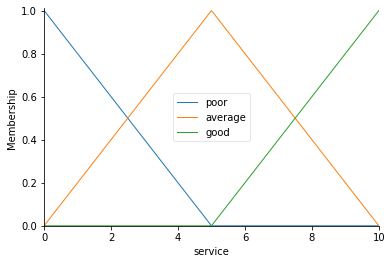

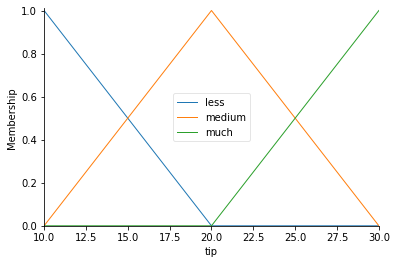

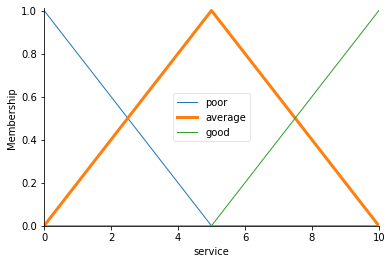

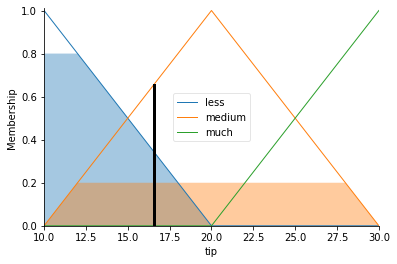

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['medium']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor']&service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'], tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'], tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'], tip['less'])
rule5=ctrl.Rule(food['average']&service['average'], tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'], tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'], tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'], tip['much'])
rule9=ctrl.Rule(food['good']&service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=1
tipping.input['service']=1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

30.0


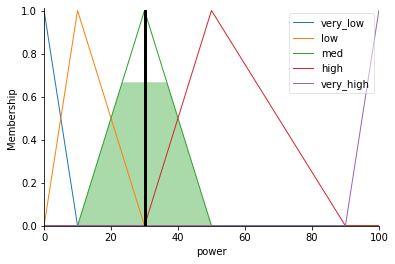

In [45]:
#Khai báo các biến
time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very_fast']=fuzz.trimf(time.universe,[10,10,15])
time['fast']=fuzz.trimf(time.universe,[10,15,20])
time['med']=fuzz.trimf(time.universe,[15,20,60])
time['slow']=fuzz.trimf(time.universe,[60,150,300])
time['very_slow']=fuzz.trimf(time.universe,[150,300,300])
#time['very_fast'].view()

rice['very_less']=fuzz.trimf(rice.universe,[100,120,500])
rice['less']=fuzz.trimf(rice.universe,[120,600,1000])
rice['med']=fuzz.trimf(rice.universe,[600,1200,1500])
rice['much']=fuzz.trimf(rice.universe,[1200,1500,1800])
rice['very_much']=fuzz.trimf(rice.universe,[1800,2000,2000])
#rice.view()

power['very_low']=fuzz.trimf(power.universe,[0,0,10])
power['low']=fuzz.trimf(power.universe,[0,10,30])
power['med']=fuzz.trimf(power.universe,[10,30,50])
power['high']=fuzz.trimf(power.universe,[30,50,90])
power['very_high']=fuzz.trimf(power.universe,[90,100,100])
#power.view()
     

#Tạo luật
rule1 = ctrl.Rule(time['very_fast']&rice['very_less'],power['very_low'])
rule2 = ctrl.Rule(time['very_fast']&rice['less'],power['low'])
rule3 = ctrl.Rule(time['very_fast']&rice['med'],power['med'])
rule4 = ctrl.Rule(time['very_fast']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['very_fast']&rice['very_much'],power['very_high'])

rule6 = ctrl.Rule(time['fast']&rice['very_less'],power['very_low'])
rule7 = ctrl.Rule(time['fast']&rice['less'],power['low'])
rule8 = ctrl.Rule(time['fast']&rice['med'],power['med'])
rule9 = ctrl.Rule(time['fast']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['fast']&rice['very_much'],power['very_high'])

rule11 = ctrl.Rule(time['med']&rice['very_less'],power['low'])
rule12 = ctrl.Rule(time['med']&rice['less'],power['low'])
rule13 = ctrl.Rule(time['med']&rice['med'],power['med'])
rule14 = ctrl.Rule(time['med']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['med']&rice['very_much'],power['very_high'])

rule16 = ctrl.Rule(time['slow']&rice['very_less'],power['low'])
rule17 = ctrl.Rule(time['slow']&rice['less'],power['low'])
rule18 = ctrl.Rule(time['slow']&rice['med'],power['med'])
rule19 = ctrl.Rule(time['slow']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['slow']&rice['very_much'],power['high'])


rule21 = ctrl.Rule(time['very_slow']&rice['very_less'],power['very_low'])
rule22 = ctrl.Rule(time['very_slow']&rice['less'],power['low'])
rule23 = ctrl.Rule(time['very_slow']&rice['med'],power['med'])
rule24 = ctrl.Rule(time['very_slow']&rice['much'],power['high'])
rule25 = ctrl.Rule(time['very_slow']&rice['very_much'],power['high'])

#Học các rule
P_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
P = ctrl.ControlSystemSimulation(P_ctrl)
#Input các giá trị và tính toán
P.input['time']=200
P.input['rice']=1000
P.compute()
print(P.output['power'])
power.view(sim=P)